In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.optimize as opt
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

## Problem 1
### (1)

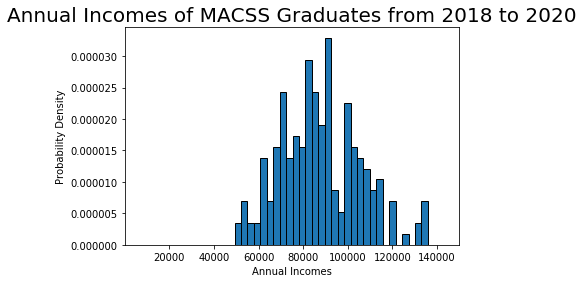

In [3]:
incomes = np.loadtxt('data/incomes.txt')

num_bins = 30
plt.hist(incomes, num_bins, edgecolor = 'k', normed = True)
plt.title("Annual Incomes of MACSS Graduates from 2018 to 2020",
         fontsize=20)
plt.xlabel("Annual Incomes")
plt.ylabel("Percent o")
plt.xlim([1, 150000])
plt.show()

## (b)

In [5]:
def trunc_lognorm_pdf(x, mu, sigma, lb = None, ub = None):
    if lb == 'None' and ub == None:
        prob_notcut = 1.0
    elif lb != None and ub == None:
        prob_notcut = 1.0 - sts.lognorm.cdf(lb, s = sigma, scale = np.exp(mu))
    elif lb == None and ub != None:
        prob_notcut = sts.lognorm.cdf(ub, s = sigma, scale = np.exp(mu))
    elif lb != None and ub != None:
        prob_notcut = sts.lognorm.cdf(ub, s = sigma, scale = np.exp(mu)) -\
                      sts.lognorm.cdf(lb, s = sigma, scale = np.exp(mu))
    pdf_vals = ((1/(x*sigma * np.sqrt(2 * np.pi)) 
                 * np.exp( -(np.log(x)-mu)**2 / (2*sigma**2))) 
                / prob_notcut)
    return pdf_vals

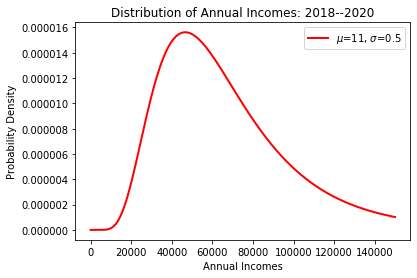

In [6]:
dist_incomes = np.linspace(0, 150000, 5000)
mu0, sigma0 = 11, 0.5
plt.plot(dist_incomes, trunc_lognorm_pdf(dist_incomes, mu0, sigma0, 1, 150000), linewidth = 2, color = 'r', label = '$\mu$=11, $\sigma$=0.5')
plt.title('Distribution of Annual Incomes: 2018--2020')
plt.xlabel('Annual Incomes')
plt.ylabel('Probability Density')
plt.legend(loc = 'upper right')
plt.show()

## (C)

In [59]:
def crit(parameters, *args):
    mu, sigma = parameters
    xs, lb, ub = args
    log_lk_val = log_lk_log_normal(xs, mu, abs(sigma), lb, ub)
    neg_log_lk_val = - log_lk_val
    
    return neg_log_lk_val

In [60]:
mu_init = 11
sigma_init = 0.5
parameters_init = np.array([mu_init, sigma_init])
mle_args = (incomes, 0, 150000)
results_uncstr = opt.minimize(crit, parameters_init, args = (mle_args))

mu_MLE, sigma_MLE = results_uncstr.x
MLE = log_lk_log_normal(incomes, mu_MLE, sigma_MLE, 0, 150000)
Hess = results_uncstr.hess_inv

print('MLE for mu:', mu_MLE)
print('MLE for sigma:', sigma_MLE)
print('Value of the likelihood function:', MLE)
print('The inverse Hessian matrix:', Hess)


MLE for mu: 11.361699972314367
MLE for sigma: 0.21174326151538592
Value of the likelihood function: -2240.9343375116364
The inverse Hessian matrix: [[0.00049802 0.00019204]
 [0.00019204 0.00015645]]


/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


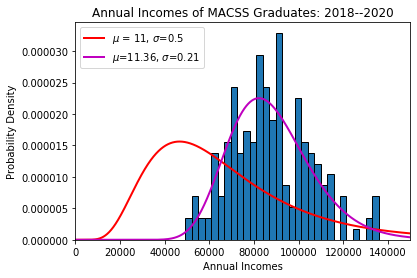

In [71]:
# plot the histagram 
plt.hist(incomes, num_bins, density=True, edgecolor='k')
plt.title('Annual Incomes of MACSS Graduates: 2018--2020')
plt.xlabel('Annual Incomes')
plt.ylabel('Probability Density')
plt.xlim([0, 150000])

plt.plot(dist_incomes, trunc_lognorm_pdf(dist_incomes, mu0, sigma0, 1, 150000),
        linewidth=2, color='r', label='$\mu$ = 11, $\sigma$=0.5')
plt.legend(loc = 'upper left')

plt.plot(dist_incomes, trunc_lognorm_pdf(dist_incomes, mu_MLE, sigma_MLE, 1, 150000), 
         linewidth = 2, color='m', label='$\mu$=11.36, $\sigma$=0.21')
plt.legend(loc='upper left')

plt.show()



## (d)

In [72]:

log_lk_h0 = log_lk_log_normal(incomes, mu0, sigma0, 0, 150000)
print('hypothesis value log likelihood', log_lk_h0)
log_lk_mle = log_lk_log_normal(incomes, mu_MLE, sigma_MLE, 0, 150000)
print('MLE log likelihood', log_lk_mle)
LR_val = 2 * (log_lk_mle - log_lk_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)


hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.9343375116364
likelihood ratio value 276.37250884038167
chi squared of H0 with 2 degrees of freedom p-value =  0.0


As p-value is very small (extremely close to 0), we can reject the null hypothesis that the probability that the data in incomes.txt came from the distribution in part (b).

## (e)

In [75]:
p1 = 1 - sts.lognorm.cdf(100000, s=sigma_MLE, scale=np.exp(mu_MLE))
p2 = sts.lognorm.cdf(75000, s=sigma_MLE, scale=np.exp(mu_MLE))
print('Probability of earning more than $100,000 is ', p1)
print('Probability of earning less than $75,000 is ', p2)


Probability of earning more than $100,000 is  0.23755401366049256
Probability of earning less than $75,000 is  0.25964392494980326


## Problem 2
### (a)

In [86]:
df = pd.read_csv('data/sick.txt')
df.head()


,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [98]:
def norm_pdf(x, sigma):
    sigma = abs(sigma)
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x)**2/(2*sigma**2))


def log_lknorm(y, x1, x2, x3, b0, b1, b2, b3, sigma):
    err = y - b0 - b1 * x1 - b2 * x2 - b3 * x3
    pdf_vals = norm_pdf(err, sigma)
    return (np.log(pdf_vals)).sum()


def crit_2(parameters, *args):
    b0, b1, b2, b3, sigma = parameters
    y, x1, x2, x3 = args
    return -log_lknorm(y, x1, x2, x3, b0, b1, b2, b3, sigma)



In [100]:
b0_init, b1_init, b2_init, b3_init, sig_init = (0.2, 0, 0, 0, 1)
y, x1, x2, x3 = df['sick'], df['age'], df['children'], df['avgtemp_winter']
parameters_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
res = opt.minimize(crit_2, parameters_init, (y, x1, x2, x3))
b0, b1, b2, b3, sigma = res.x
print('The estimates are as follows')
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)
print('b3 = ', b3)
print('sigma = ', sigma)


The estimates are as follows
b0 =  0.25164657743236246
b1 =  0.012933389662209218
b2 =  0.40050177159977757
b3 =  -0.00999170144778414
sigma =  0.003017676295795841


In [104]:
Hess = res.hess_inv
MLE = log_lknorm(y, x1, x2, x3, b0, b1, b2, b3, sigma)
print('The value of the log likelihood function:', MLE)
print('The estimated variance covariance matrix of the estimates:\n', Hess)

The value of the log likelihood function: 876.8650477456889
The estimated variance covariance matrix of the estimates:
 [[ 1.02601558e-06  6.76217712e-09 -1.61457419e-07 -2.23447561e-08
  -2.62509024e-09]
 [ 6.76217712e-09  3.99882010e-09 -3.59520203e-08 -2.49007806e-09
  -2.98856777e-10]
 [-1.61457419e-07 -3.59520203e-08  3.75727605e-07  2.26789439e-08
   4.78055308e-10]
 [-2.23447561e-08 -2.49007806e-09  2.26789439e-08  1.95181525e-09
   2.90327774e-10]
 [-2.62509024e-09 -2.98856777e-10  4.78055308e-10  2.90327774e-10
   2.29769926e-08]]


## (b)

In [107]:
b_0, b_1, b_2, b_3, sigma_1 = 1, 0, 0, 0, 0.1
log_lkh1 = log_lknorm(y, x1, x2, x3, b_0, b_1, b_2, b_3, sigma_1)
log_lkmle = log_lknorm(y, x1, x2, x3, b0, b1, b2, b3, sigma)
LR_val = 2 * (log_lkmle - log_lkh1)
pval_h1 = 1.0 - sts.chi2.cdf(LR_val, 2)

print('Hypothesis value log likelihood:', log_lkh1)
print('MLE log likelihood:', log_lkmle)
print('Likelihood ratio value:', LR_val)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h1)


Hypothesis value log likelihood: -2253.700688042125
MLE log likelihood: 876.8650477456889
Likelihood ratio value: 6261.131471575628
chi squared of H0 with 5 degrees of freedom p-value =  0.0


Since the p-value is extremely close to 0, we can reject the hypothesis that age, number of children, and average winter temperature have no effect on the number of sick days. That is, it's impossible that age, number of children, and average winter temperature have no effect on the number of sick days.